In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os

In [1]:
data_dir = '../../data/'
output_file = data_dir+'image_visualization_adult/'

try:
    os.mkdir(output_file)
except:
    print(output_file+ "exits")

../../data/image_visualization_adult/exits


In [4]:
adult_data = pd.read_csv('../../data/adult_patients_report_drug_reaction.csv.gz',compression='gzip')

/tmp/ipykernel_28770/3790179414.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  adult_data = pd.read_csv('../../data/adult_patients_report_drug_reaction.csv.gz',compression='gzip')


In [5]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11151664 entries, 0 to 11151663
Data columns (total 26 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   patient_custom_master_age       float64
 2   patient_custom_master_age_unit  object 
 3   patient_onsetage                float64
 4   patient_onsetageunit            object 
 5   patient_sex                     object 
 6   safetyreportid                  object 
 7   lastupdate_date                 object 
 8   mostrecent_receive_date         object 
 9   receive_date                    object 
 10  congenital_anomali              int64  
 11  death                           int64  
 12  disabling                       int64  
 13  hospitalization                 int64  
 14  life_threatening                int64  
 15  other                           int64  
 16  serious                         object 
 17  reporter_company         

In [6]:
print(f"จำนวนข้อมูลทั้งหมด: {adult_data.shape[0]:,} แถว")


จำนวนข้อมูลทั้งหมด: 11,151,664 แถว


In [7]:
unique_safetyreportid = adult_data['safetyreportid'].nunique()
duplicate_safetyreportid = adult_data['safetyreportid'].duplicated().sum()


print(f'จำนวนรายงานที่ไม่มีการซ้ำกันคือ {unique_safetyreportid:,} รายงาน')
print(f'จำนวนรายงานที่มีการซ้ำกันคือ {duplicate_safetyreportid:,} รายงาน')
print(f'จำนวนรายงานทั้งหมดคือ {unique_safetyreportid + duplicate_safetyreportid:,} รายงาน จะเท่ากับข้อมูลต้นฉบับ {len(adult_data):,} รายงาน')

จำนวนรายงานที่ไม่มีการซ้ำกันคือ 1,246,276 รายงาน
จำนวนรายงานที่มีการซ้ำกันคือ 9,905,388 รายงาน
จำนวนรายงานทั้งหมดคือ 11,151,664 รายงาน จะเท่ากับข้อมูลต้นฉบับ 11,151,664 รายงาน


In [8]:
drug_unique = adult_data['medicinal_product'].nunique()
reaction_unique = adult_data['reaction_meddrapt'].nunique()
print(f'จำนวนยาที่ไม่ซ้ำกันทั้งหมด: {drug_unique:,} รายการ')
print(f'จำนวนอาการที่ไม่ซ้ำกันทั้งหมด: {reaction_unique:,} รายการ')

จำนวนยาที่ไม่ซ้ำกันทั้งหมด: 92,557 รายการ
จำนวนอาการที่ไม่ซ้ำกันทั้งหมด: 22,691 รายการ


In [9]:
# จำนวน reaction ที่แต่ละยาเกิดขึ้น
drug_reaction_count = adult_data.groupby('medicinal_product')['reaction_meddrapt'].nunique().reset_index()
drug_reaction_count.columns = ['medicinal_product', 'num_unique_reactions']
drug_reaction_count.sort_values(by='num_unique_reactions', ascending=False)

,medicinal_product,num_unique_reactions
9608,AVONEX,6621
30739,ENBREL,6319
68460,PREDNISONE,5805
53966,METHOTREXATE,5738
8603,ASPIRIN,5668
...,...,...
26446,DIBUCAINE HYDROCHLORIDE,1
26443,DIBROMPROPAMIDINE ISETIONATE/PROMETHAZINE HYDR...,1
26437,DIBIZIDE M,1
92543,^THYROID NOS^,1


In [10]:
# จำนวน ยา ที่พบ reaction
drug_reaction_count = adult_data.groupby('reaction_meddrapt')['medicinal_product'].nunique().reset_index()
drug_reaction_count.columns = ['reaction_meddrapt', 'num_unique_drugs']
drug_reaction_count.sort_values(by='num_unique_drugs', ascending=False)

,reaction_meddrapt,num_unique_drugs
14046,NAUSEA,11569
6402,DYSPNOEA,10789
22165,VOMITING,10267
16786,PYREXIA,10059
6150,DIARRHOEA,9537
...,...,...
20364,THYROGLOBULIN DECREASED,1
12871,MEDICAL OBSERVATION ABNORMAL,1
12893,MELANAEMIA,1
13995,NASAL CANDIDIASIS,1


### Part 1 Patient

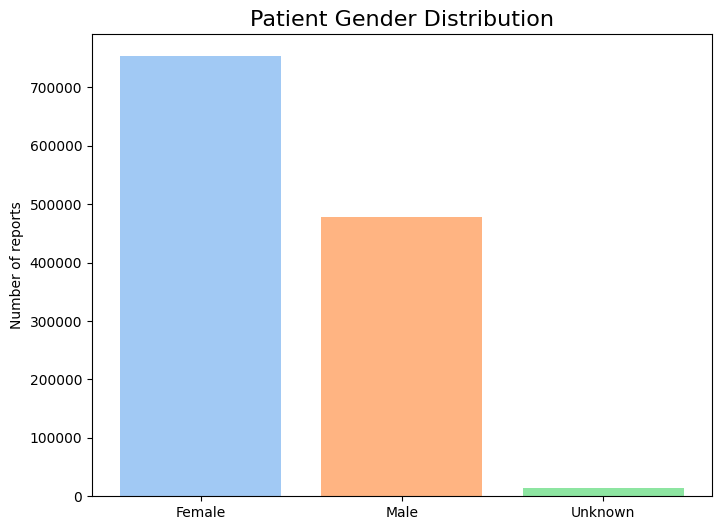

In [11]:
# 1.1 การวิเคราะห์สัดส่วนเพศของผู้ป่วย (patient_sex)
rep = adult_data.drop_duplicates('safetyreportid').copy()

plt.figure(figsize=(8, 6))
sex_counts = rep['patient_sex'].value_counts()
plt.bar(sex_counts.index, sex_counts.values, color=sns.color_palette('pastel'))
plt.title('Patient Gender Distribution', fontsize=16)
plt.ylabel('Number of reports')
plt.savefig(output_file+'1_1_patient_gender_distribution.png')
plt.show()


In [13]:
values = adult_data.groupby('safetyreportid')['patient_custom_master_age'].agg('mean').dropna().values
print("จำนวนค่าเฉลี่ยอายุที่ไม่เป็น NaN:", len(values))
print("สัดส่วนต่อจำนวนทั้งหมด:", len(values) / adult_data.shape[0])

จำนวนค่าเฉลี่ยอายุที่ไม่เป็น NaN: 1246276
สัดส่วนต่อจำนวนทั้งหมด: 0.11175695393978871


In [17]:
sensical_values = values[(values > 21) & (values <= 100)]
floored = np.floor(sensical_values).astype(int)
years, counts = np.unique(floored, return_counts=True)

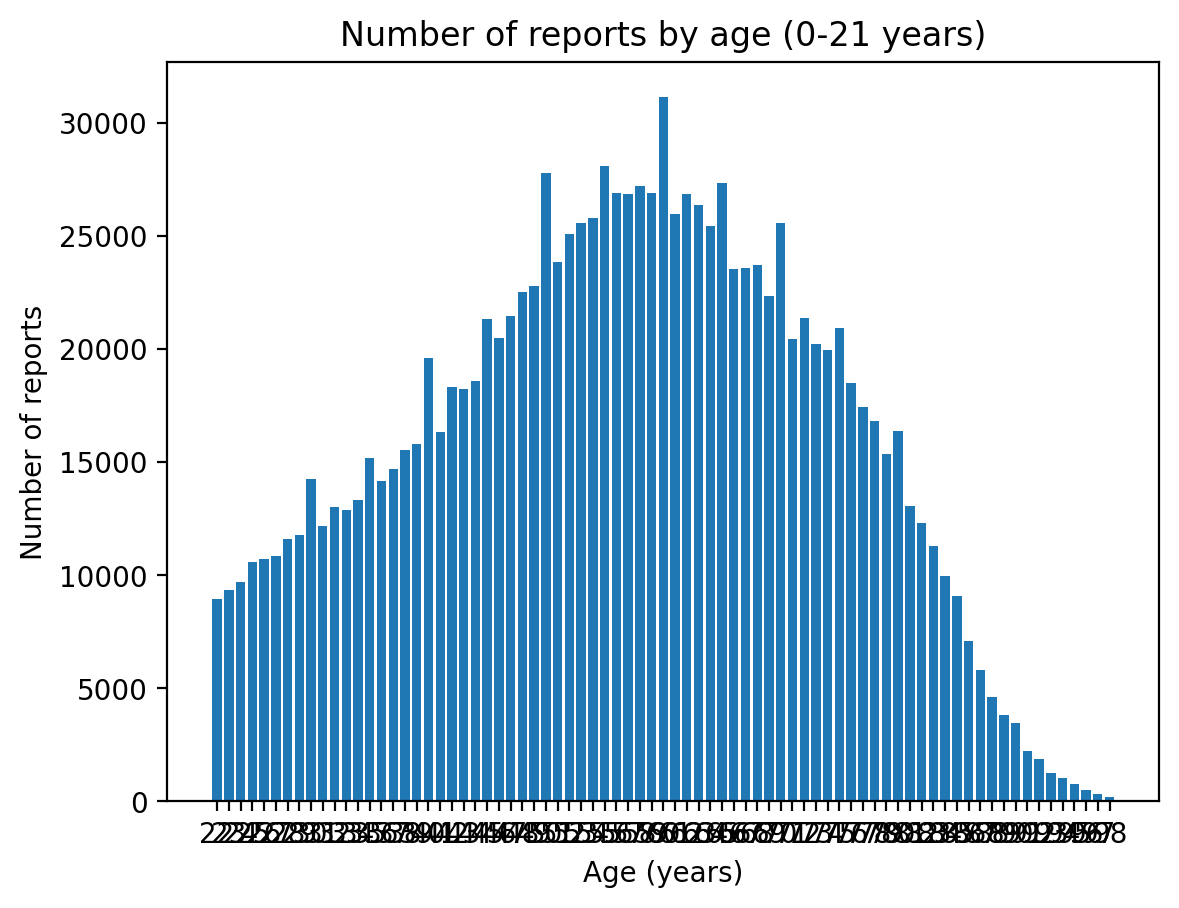

In [19]:
all_years = np.arange(22, 99)
all_counts = np.zeros_like(all_years)
for i, y in enumerate(all_years):
    if y in years:
        all_counts[i] = counts[np.where(years == y)[0][0]]


plt.figure(dpi=200)
plt.bar(all_years, all_counts)
plt.xticks(all_years)
plt.xlabel("Age (years)")
plt.ylabel("Number of reports")
plt.title("Number of reports by age (0-21 years)")
plt.savefig(output_file+'1_3_age_distribution.png')
plt.show()

In [21]:
most_common_age = adult_data['patient_custom_master_age'].mode().iloc[0]
print(f"อายุที่พบบ่อยที่สุดคือ: {most_common_age}")


อายุที่พบบ่อยที่สุดคือ: 60.0


In [22]:
median_age = adult_data['patient_custom_master_age'].median()

print(f"\nสรุปข้อมูลเบื้องต้นของผู้ป่วย:")
print(f"จำนวนข้อมูลทั้งหมด: {len(adult_data):,} รายงาน")
print(f"สัดส่วนเพศ:\n{sex_counts}")
print(f"\nค่าเฉลี่ยอายุ (ณ เวลาที่รายงาน): {adult_data['patient_custom_master_age'].mean():.2f} ปี (ค่ามัธยฐาน: {median_age:.2f} ปี)")


สรุปข้อมูลเบื้องต้นของผู้ป่วย:
จำนวนข้อมูลทั้งหมด: 11,151,664 รายงาน
สัดส่วนเพศ:
patient_sex
Female     752907
Male       478438
Unknown     14931
Name: count, dtype: int64

ค่าเฉลี่ยอายุ (ณ เวลาที่รายงาน): 56.84 ปี (ค่ามัธยฐาน: 58.00 ปี)


### Part 2 Report Characteristics

/tmp/ipykernel_28770/4234365987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='reporter_qualification',


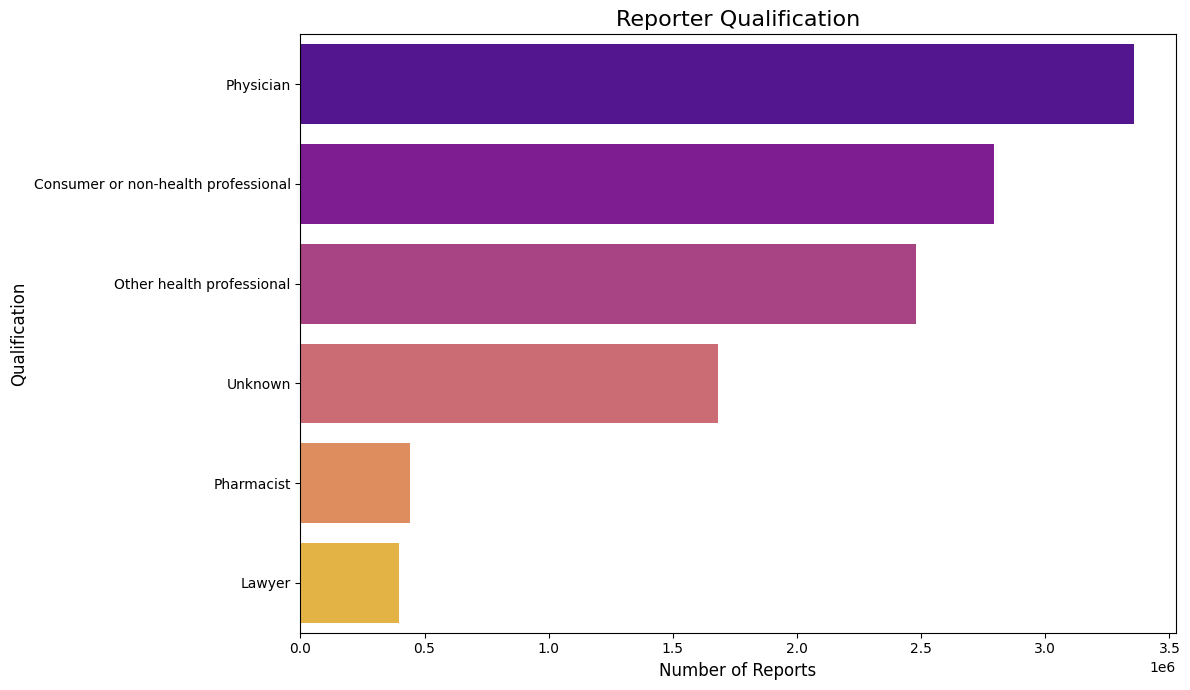

In [23]:
# 2.1 การวิเคราะห์คุณสมบัติของผู้รายงาน (reporter_qualification)
plt.figure(figsize=(12, 7))
sns.countplot(y='reporter_qualification',
              data=adult_data,
              order=adult_data['reporter_qualification'].value_counts().index,
              palette='plasma')
plt.title('Reporter Qualification', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Qualification', fontsize=12)
plt.tight_layout()
plt.savefig(output_file+'2_1_reporter_qualification.png')
plt.show()

/tmp/ipykernel_28770/1578769406.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='magma')


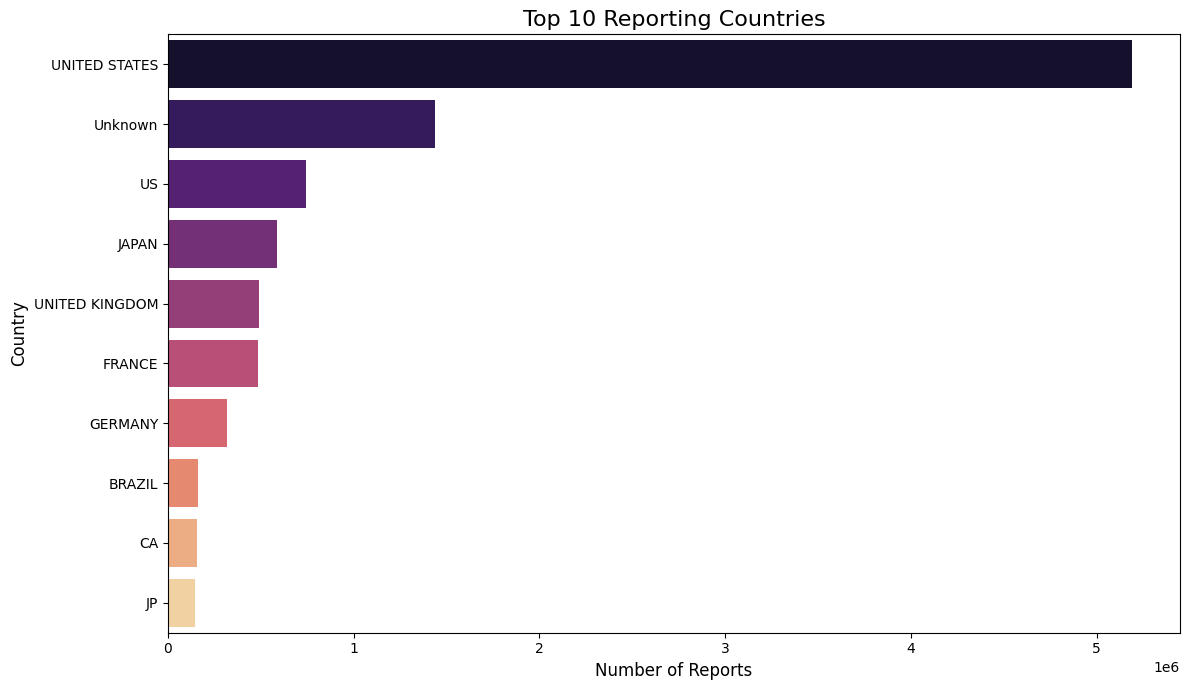

In [24]:
# 2.2 การวิเคราะห์ประเทศที่ส่งรายงาน (reporter_country) - แสดง 10 อันดับแรก
plt.figure(figsize=(12, 7))
top_10_countries = adult_data['reporter_country'].value_counts().nlargest(10)
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='magma')
plt.title('Top 10 Reporting Countries', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.savefig(output_file+'2_2_reporter_country.png')
plt.show()

/tmp/ipykernel_28770/1238828879.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reports = adult_data.set_index('receive_date').resample('M').size()


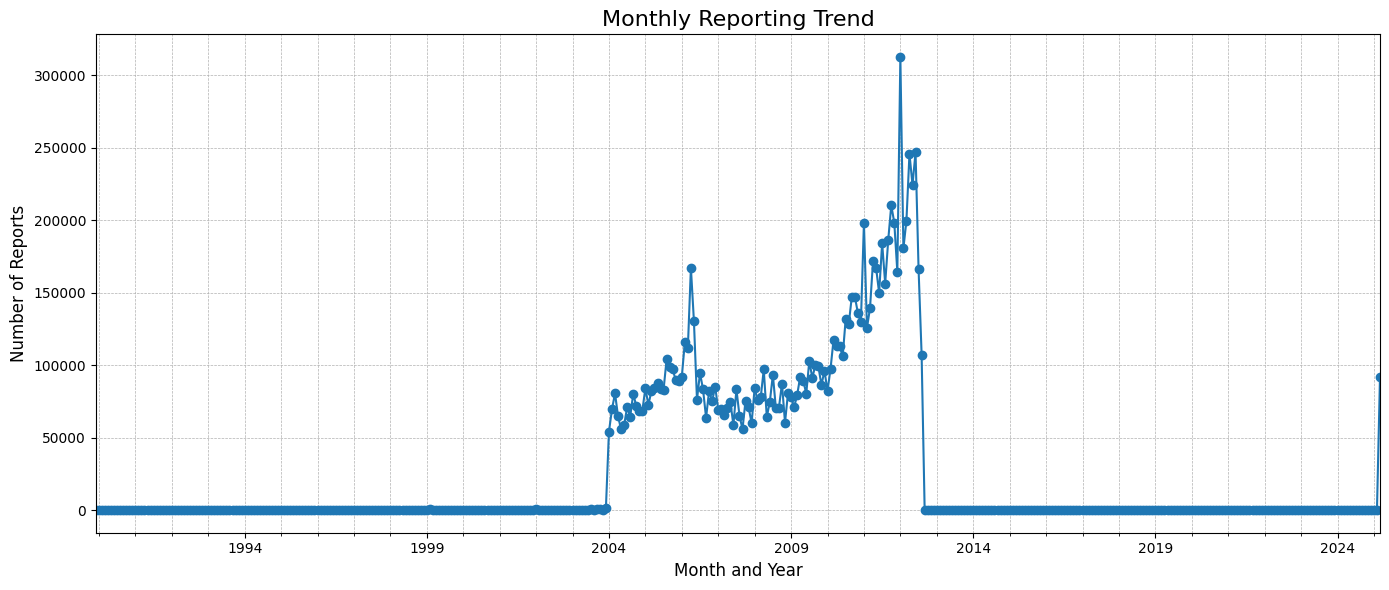

In [25]:
# 2.3 การวิเคราะห์แนวโน้มการรายงานตามช่วงเวลา (receive_date)
# แปลงคอลัมน์ 'receive_date' ให้เป็น datetime ก่อน
adult_data['receive_date'] = pd.to_datetime(adult_data['receive_date'])

# นับจำนวนรายงานในแต่ละเดือน
monthly_reports = adult_data.set_index('receive_date').resample('M').size()

plt.figure(figsize=(14, 6))
monthly_reports.plot(kind='line', marker='o', linestyle='-')
plt.title('Monthly Reporting Trend', fontsize=16)
plt.xlabel('Month and Year', fontsize=12)
plt.ylabel('Number of Reports', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(output_file+'2_3_report_trend_by_month.png')
plt.show()

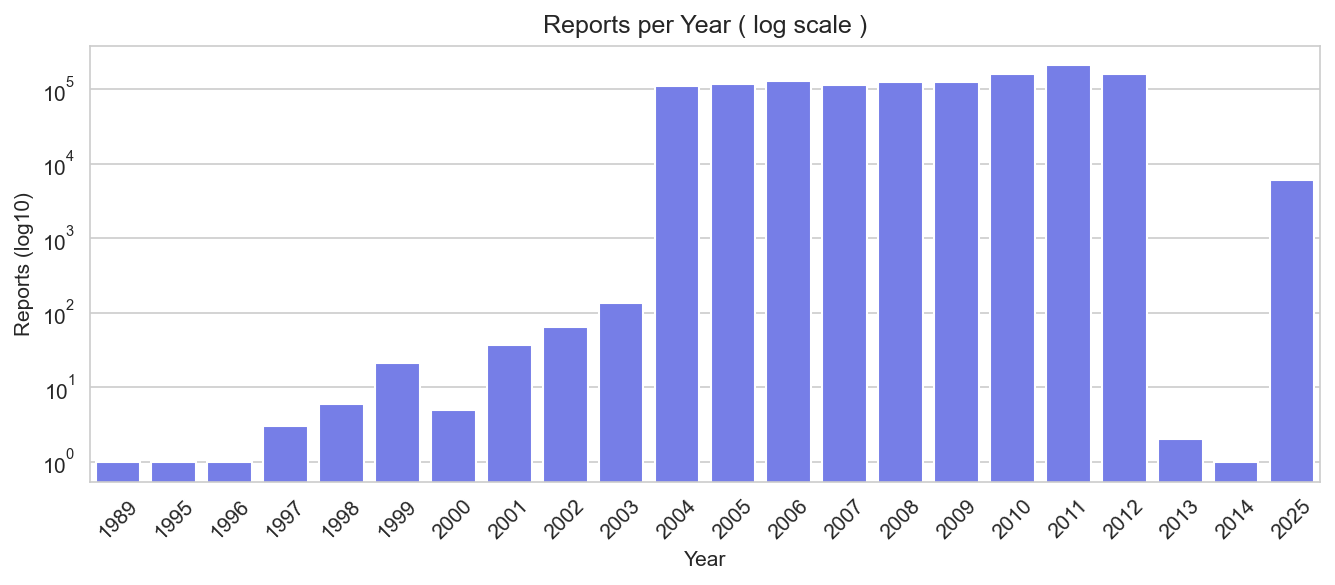

In [26]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set_style("whitegrid"); plt.rcParams["figure.dpi"] = 150

# -- โหลดและเตรียมวันที่ -----------------------------------------
df = adult_data      
df["receive_date"] = pd.to_datetime(df["receive_date"], errors="coerce")

# -- ตัดซ้ำให้เหลือ “หนึ่งรายงานต่อ safetyreportid” --------------
rep = df.drop_duplicates("safetyreportid").copy()
rep["report_year"] = rep["receive_date"].dt.year

# -- กราฟจำนวนรายงานต่อปี ----------------------------------------
year_cnt = rep["report_year"].value_counts().sort_index()

plt.figure(figsize=(9,4))
sns.barplot(x=year_cnt.index.astype(int), y=year_cnt.values, color="#636EFA")
plt.yscale("log")                         
plt.title("Reports per Year ( log scale )")
plt.xlabel("Year"); plt.ylabel("Reports (log10)")
plt.xticks(rotation=45)
plt.tight_layout(); plt.show()



In [30]:
print("\nสรุปข้อมูลเบื้องต้นของการรายงาน:")
print("คุณสมบัติผู้รายงาน 5 อันดับแรก:")
print(adult_data['reporter_qualification'].value_counts().head())
print("\nประเทศที่ส่งรายงาน 5 อันดับแรก:")
print(adult_data['reporter_country'].value_counts().head())


สรุปข้อมูลเบื้องต้นของการรายงาน:
คุณสมบัติผู้รายงาน 5 อันดับแรก:
reporter_qualification
Physician                              3357292
Consumer or non-health professional    2793046
Other health professional              2478888
Unknown                                1682561
Pharmacist                              441302
Name: count, dtype: int64

ประเทศที่ส่งรายงาน 5 อันดับแรก:
reporter_country
UNITED STATES     5188742
Unknown           1436351
US                 742271
JAPAN              589665
UNITED KINGDOM     491483
Name: count, dtype: int64


### Part 3 Drug Profile

/tmp/ipykernel_28770/323169356.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='drug_characterization_short',


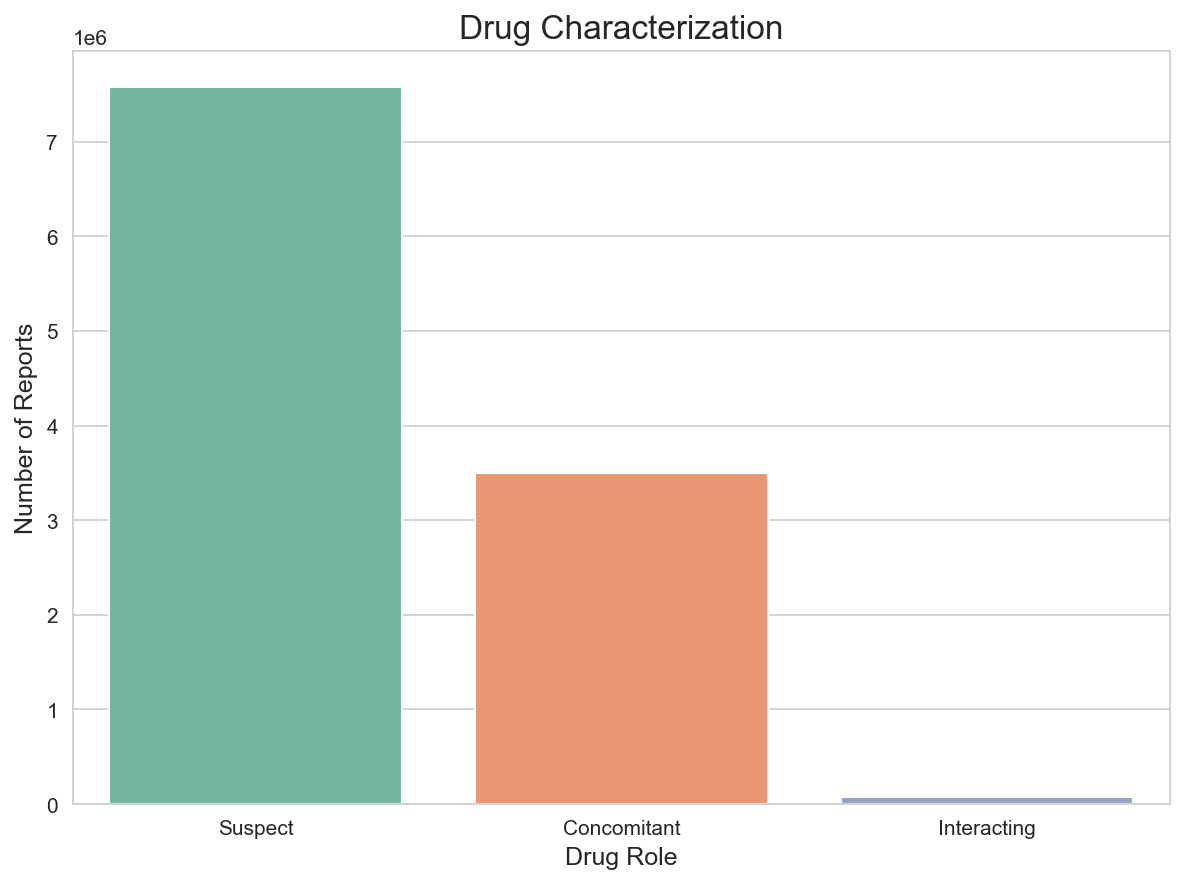

In [31]:
label_map = {
    'Suspect (the drug was considered by the reporter to be the cause)': 'Suspect',
    'Concomitant (the drug was reported as being taken along with the suspect drug)': 'Concomitant',
    'Interacting (the drug was considered by the reporter to have interacted with the suspect drug)': 'Interacting'
}

adult_data['drug_characterization_short'] = adult_data['drug_characterization'].map(label_map)

plt.figure(figsize=(8, 6))
sns.countplot(x='drug_characterization_short',
              data=adult_data,
              order=adult_data['drug_characterization_short'].value_counts().index,
              palette='Set2')
plt.title('Drug Characterization', fontsize=16)
plt.xlabel('Drug Role', fontsize=12)
plt.ylabel('Number of Reports', fontsize=12)
plt.tight_layout()
plt.savefig(output_file + '3_1_drug_characterization_short.png')
plt.show()


/tmp/ipykernel_28770/3536887920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_drugs.values, y=top_10_drugs.index, palette='rocket')


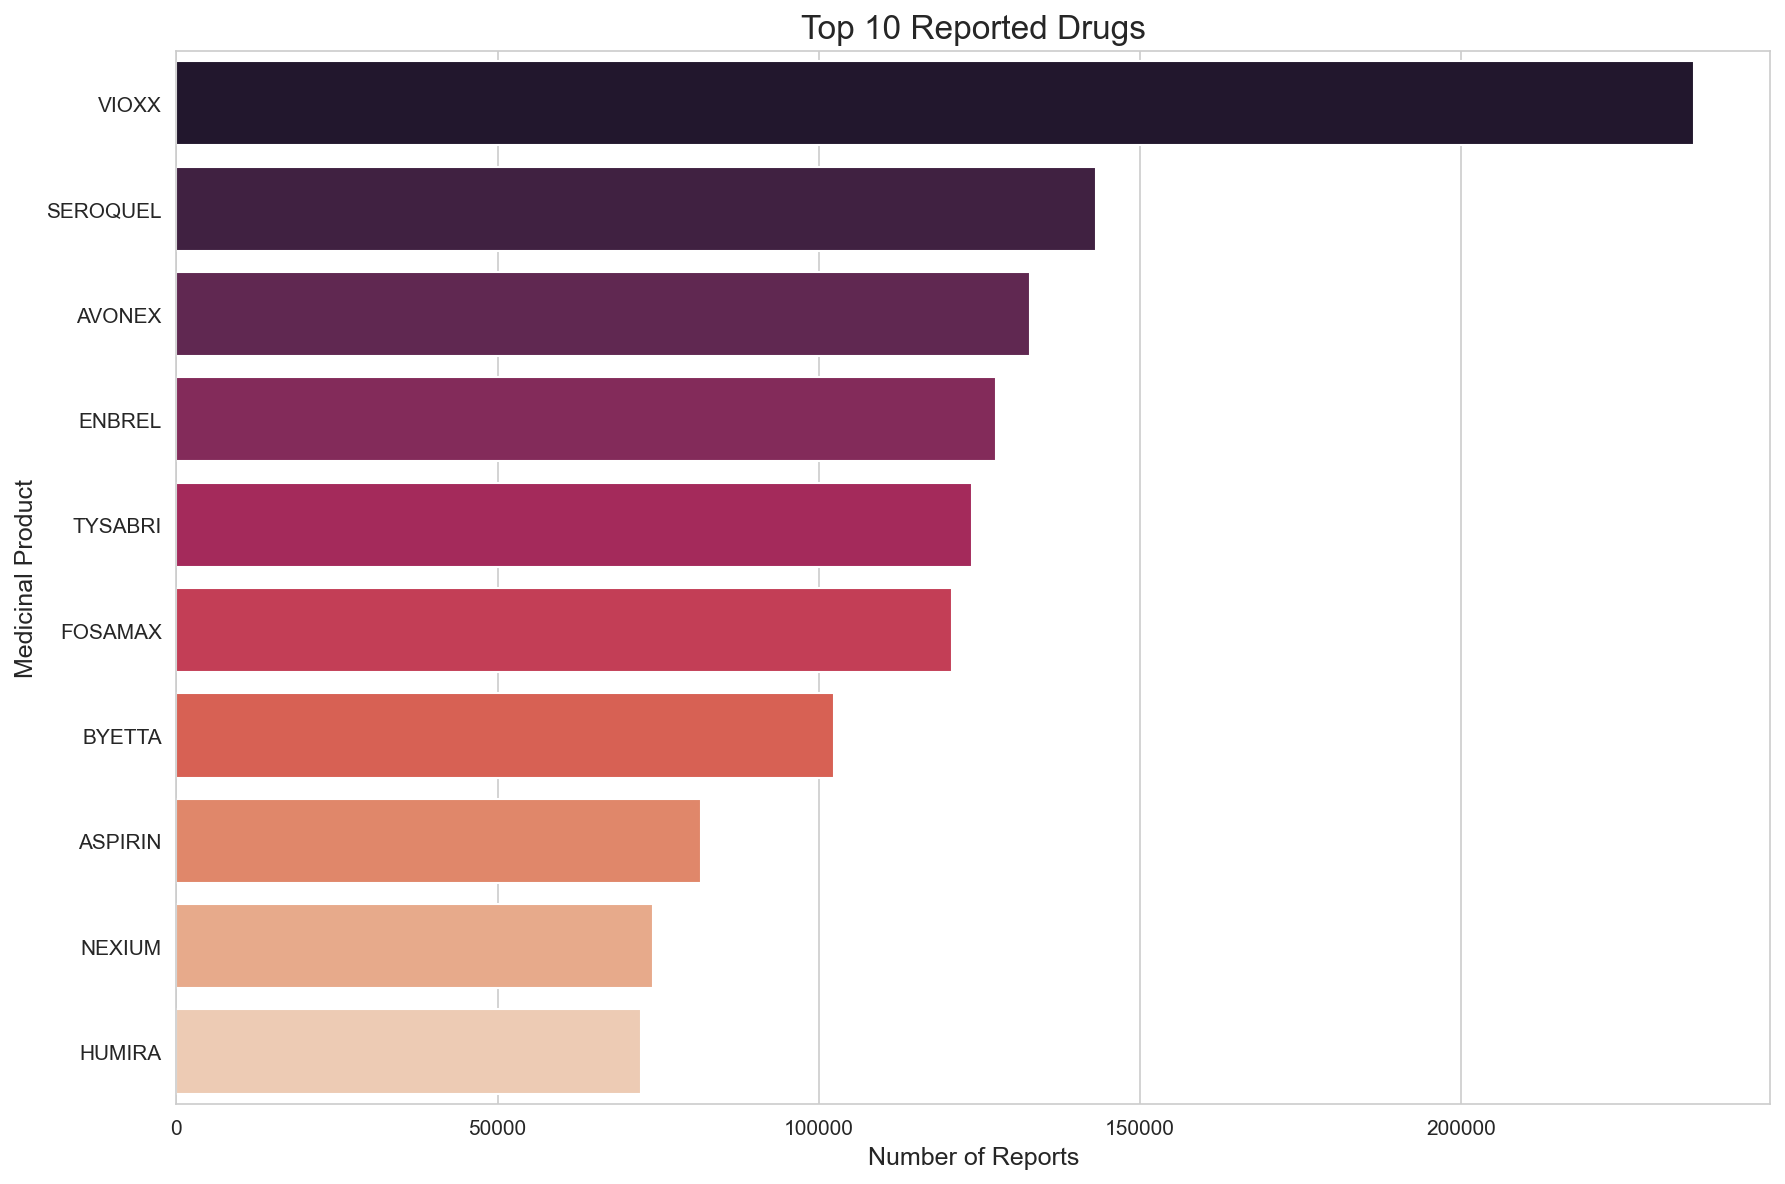

In [32]:
# 3.2 การวิเคราะห์ยาที่ถูกรายงานสูงสุด 10 อันดับ (medicinal_product)
plt.figure(figsize=(12, 8))
top_10_drugs = adult_data['medicinal_product'].value_counts().nlargest(10)
sns.barplot(x=top_10_drugs.values, y=top_10_drugs.index, palette='rocket')
plt.title('Top 10 Reported Drugs', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Medicinal Product', fontsize=12)
plt.tight_layout()
plt.savefig(output_file+'3_2_top_10_medicinal_product.png')
plt.show()


/tmp/ipykernel_28770/2471858395.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_indications.values, y=top_10_indications.index, palette='crest')


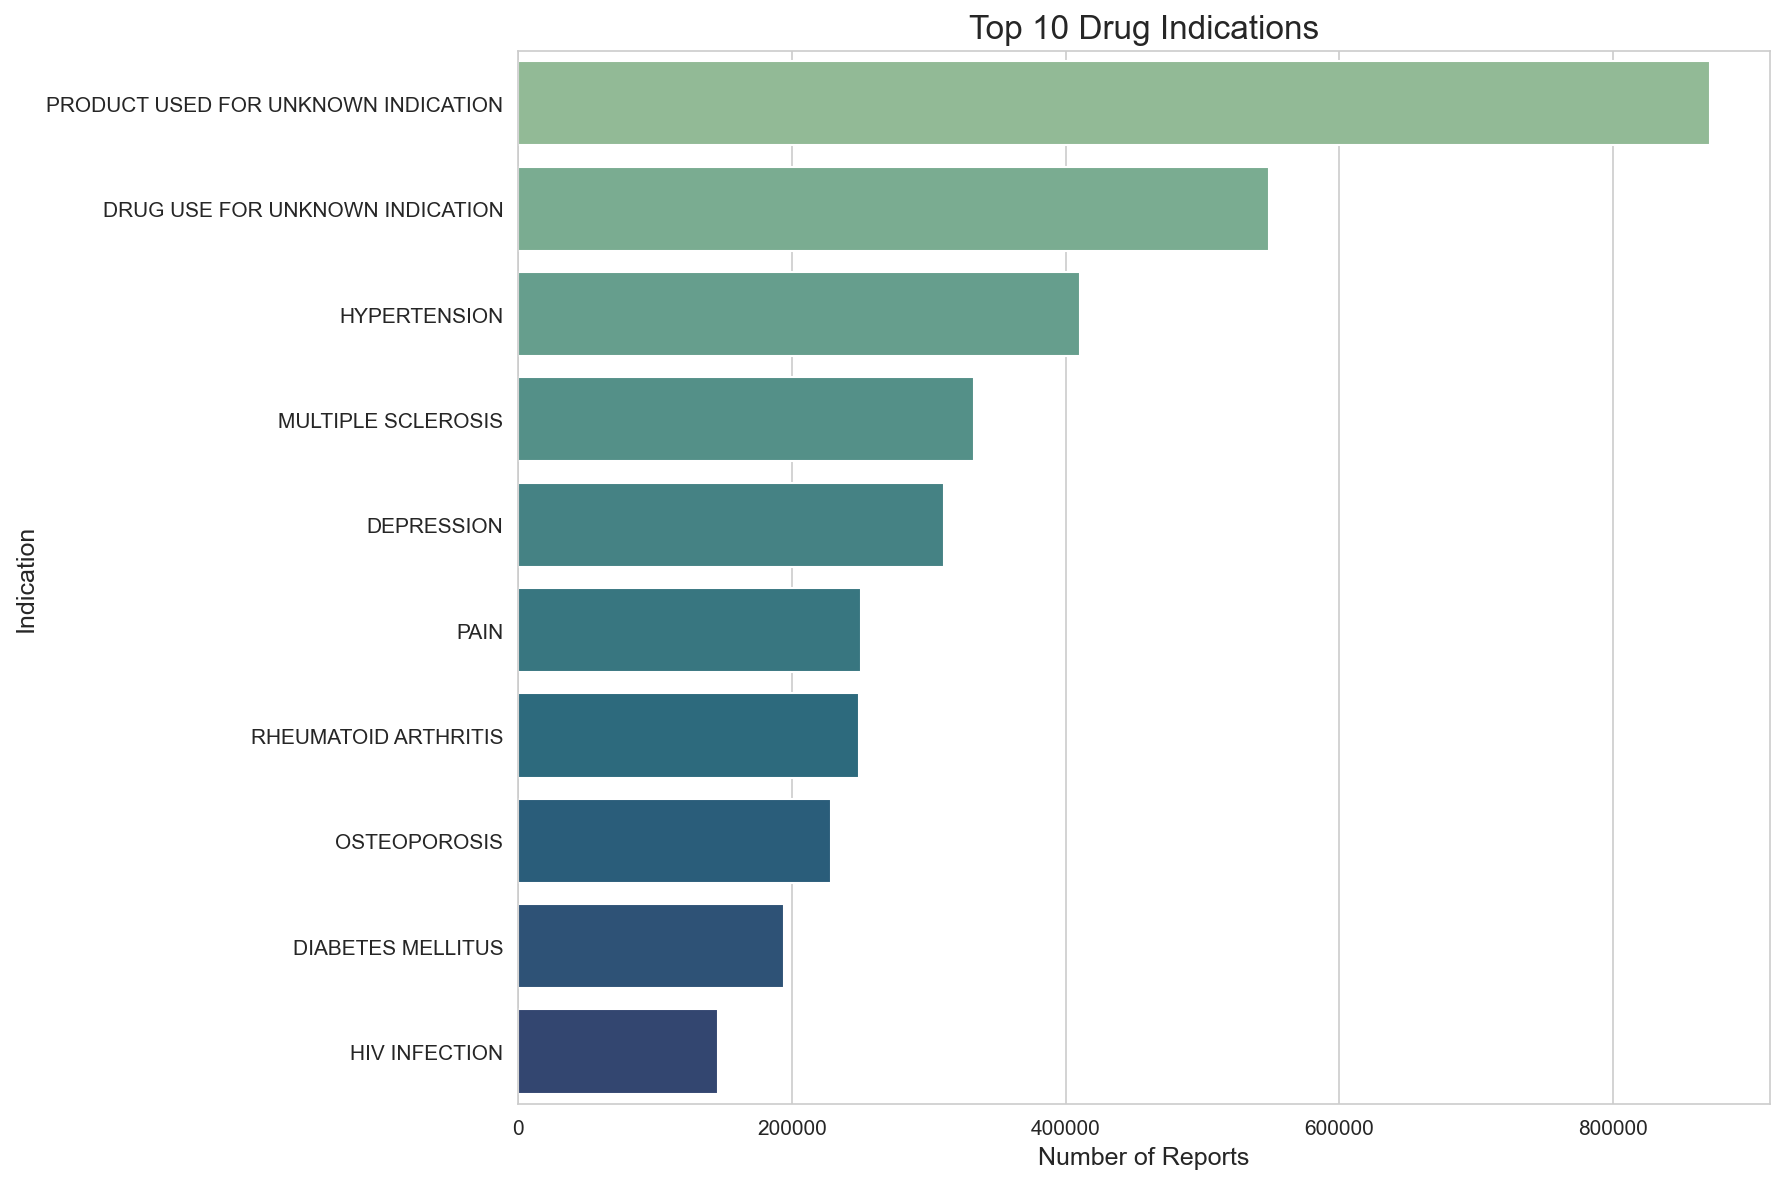

In [33]:
# 3.3 การวิเคราะห์ข้อบ่งใช้ของยาสูงสุด 10 อันดับ (drug_indication)
plt.figure(figsize=(12, 8))
top_10_indications = adult_data['drug_indication'].value_counts().nlargest(10)
sns.barplot(x=top_10_indications.values, y=top_10_indications.index, palette='crest')
plt.title('Top 10 Drug Indications', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Indication', fontsize=12)
plt.tight_layout()
plt.savefig(output_file+'3_3_top_10_drug_indication.png')
plt.show()

In [35]:
adult_data['drug_administration'].nunique()

66

/tmp/ipykernel_28770/2579863771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_indications.values, y=top_10_indications.index, palette='crest')


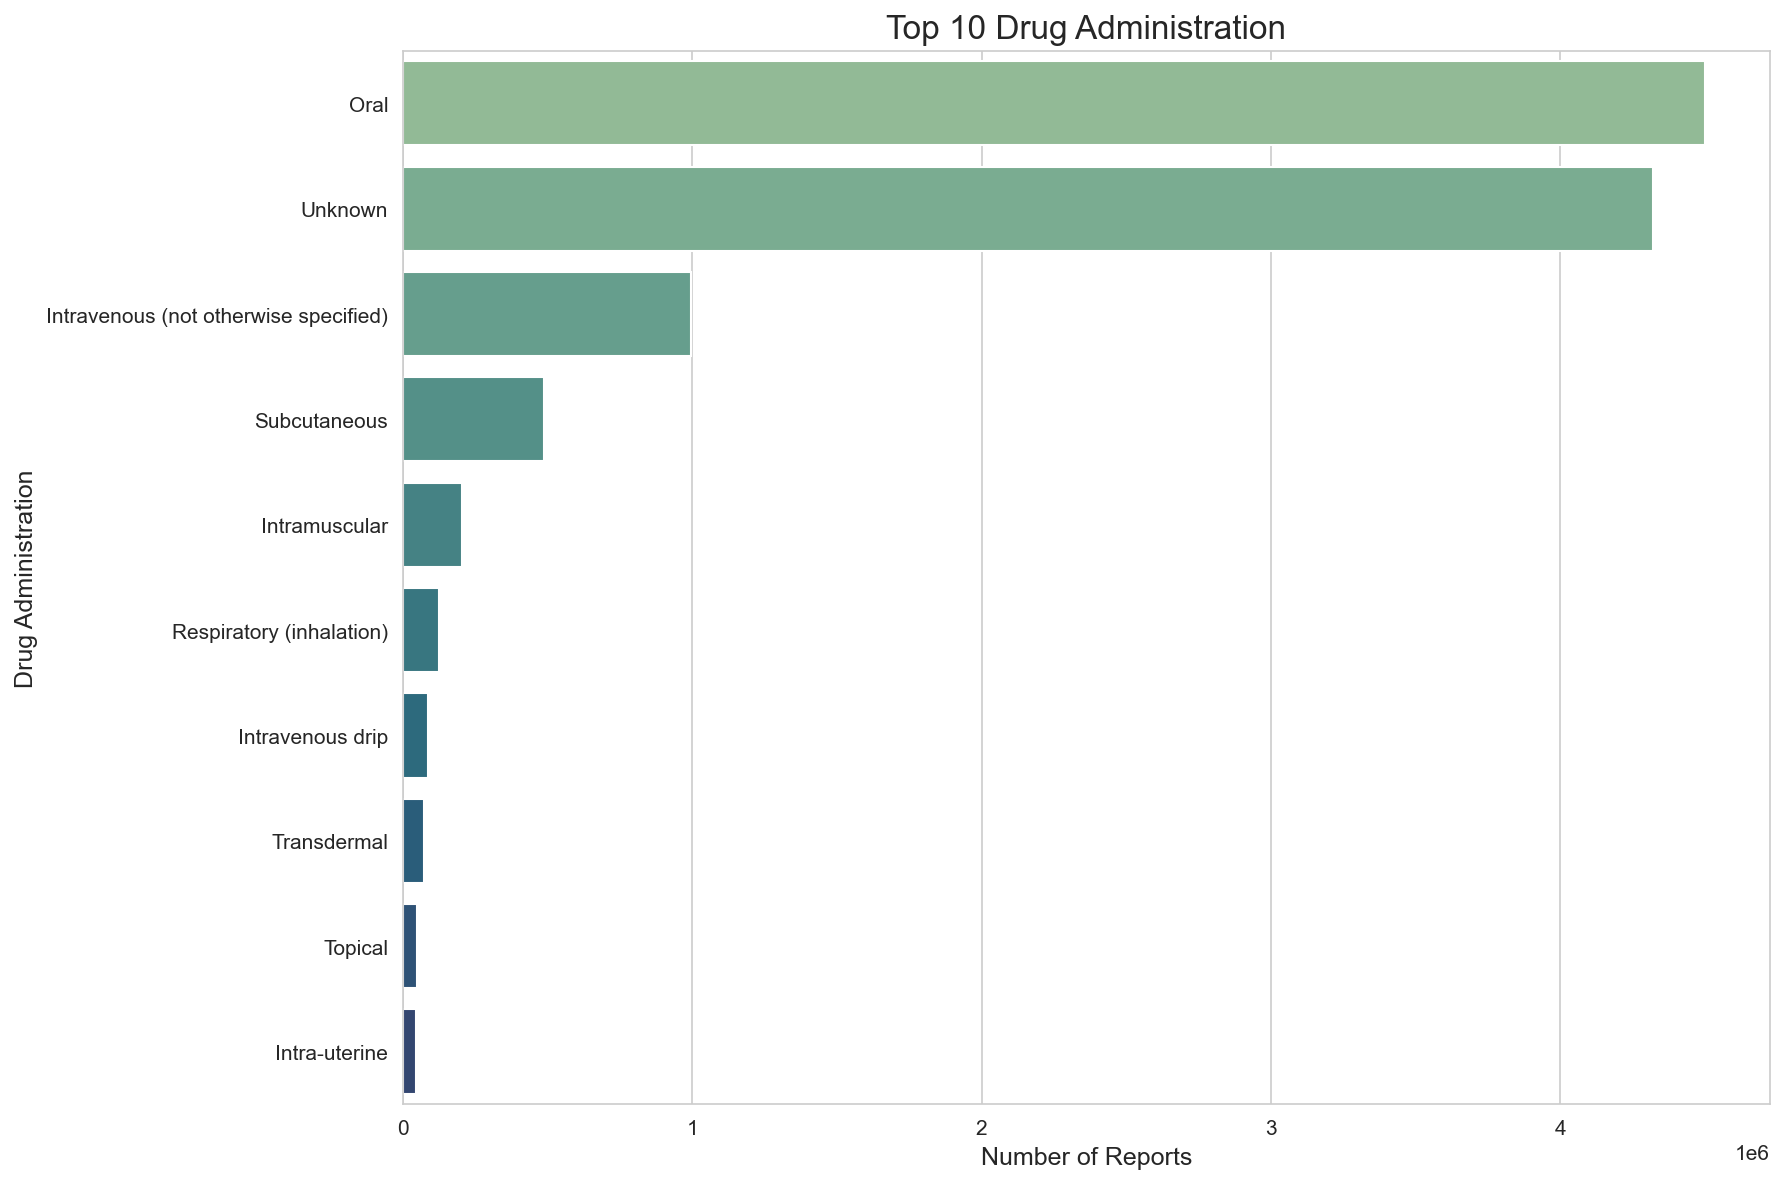

In [37]:
plt.figure(figsize=(12, 8))
top_10_indications = adult_data['drug_administration'].value_counts().nlargest(10)
sns.barplot(x=top_10_indications.values, y=top_10_indications.index, palette='crest')
plt.title('Top 10 Drug Administration', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Drug Administration', fontsize=12)
plt.tight_layout()
plt.show()

In [39]:
print("\nสรุปข้อมูลเบื้องต้นของยา:")
print("บทบาทของยา:")
print(adult_data['drug_characterization'].value_counts())
print("\nยา 5 อันดับแรกที่ถูกรายงาน:")
print(adult_data['medicinal_product'].value_counts().head())
print("\nข้อบ่งใช้ 5 อันดับแรก:")
print(adult_data['drug_indication'].value_counts().head())


สรุปข้อมูลเบื้องต้นของยา:
บทบาทของยา:
drug_characterization
Suspect (the drug was considered by the reporter to be the cause)                                 7583637
Concomitant (the drug was reported as being taken along with the suspect drug)                    3494159
Interacting (the drug was considered by the reporter to have interacted with the suspect drug)      73868
Name: count, dtype: int64

ยา 5 อันดับแรกที่ถูกรายงาน:
medicinal_product
VIOXX       236250
SEROQUEL    143220
AVONEX      132805
ENBREL      127636
TYSABRI     123767
Name: count, dtype: int64

ข้อบ่งใช้ 5 อันดับแรก:
drug_indication
PRODUCT USED FOR UNKNOWN INDICATION    871062
DRUG USE FOR UNKNOWN INDICATION        548681
HYPERTENSION                           410743
MULTIPLE SCLEROSIS                     332868
DEPRESSION                             311233
Name: count, dtype: int64


### Part 4 Reaction/Outcome Analysis

/tmp/ipykernel_28770/276098103.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_reactions.values, y=top_10_reactions.index, palette='inferno')


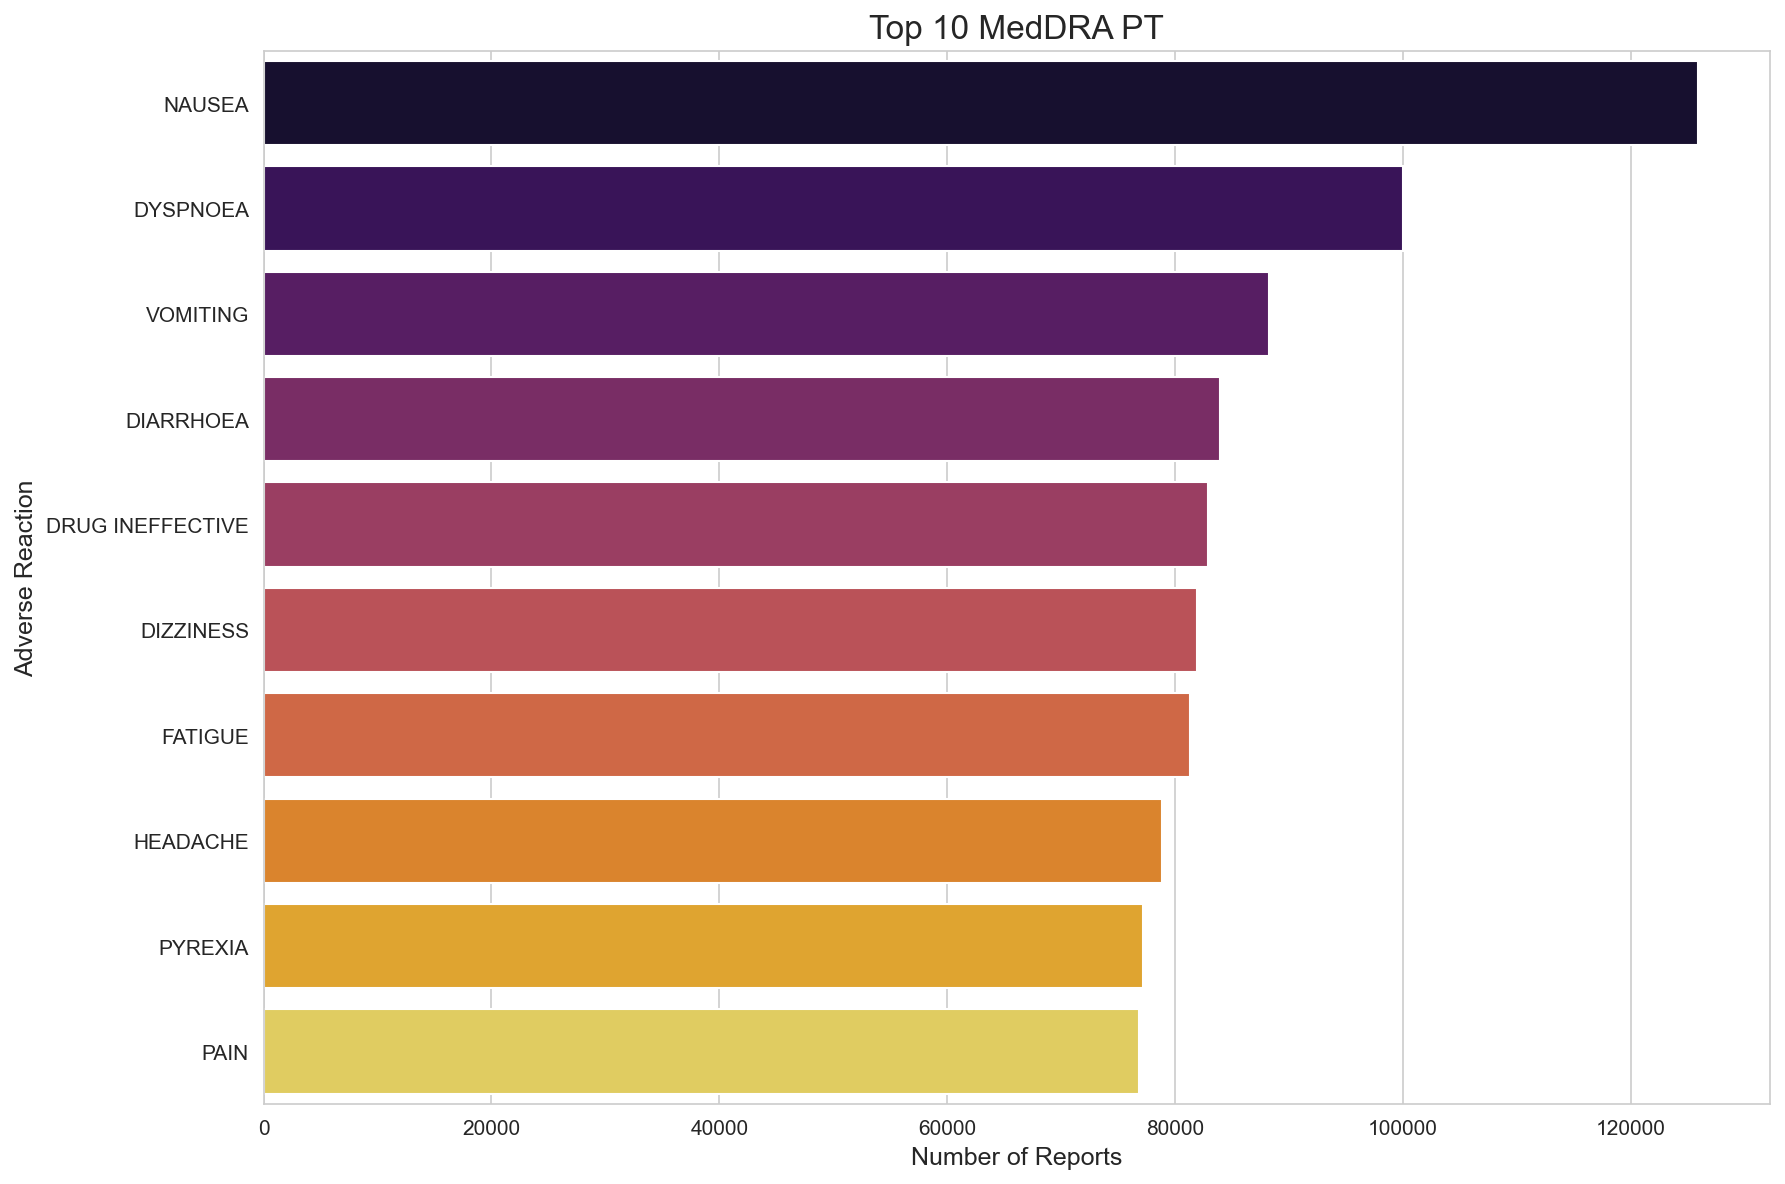

In [40]:
# 4.1 การวิเคราะห์ 10 อาการไม่พึงประสงค์ที่พบบ่อยที่สุด (reaction_meddrapt)
plt.figure(figsize=(12, 8))
top_10_reactions = adult_data['reaction_meddrapt'].value_counts().nlargest(10)
sns.barplot(x=top_10_reactions.values, y=top_10_reactions.index, palette='inferno')
plt.title('Top 10 MedDRA PT', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Adverse Reaction', fontsize=12)
plt.tight_layout()
plt.savefig(output_file+'4_1_top_10_reactions.png')
plt.show()

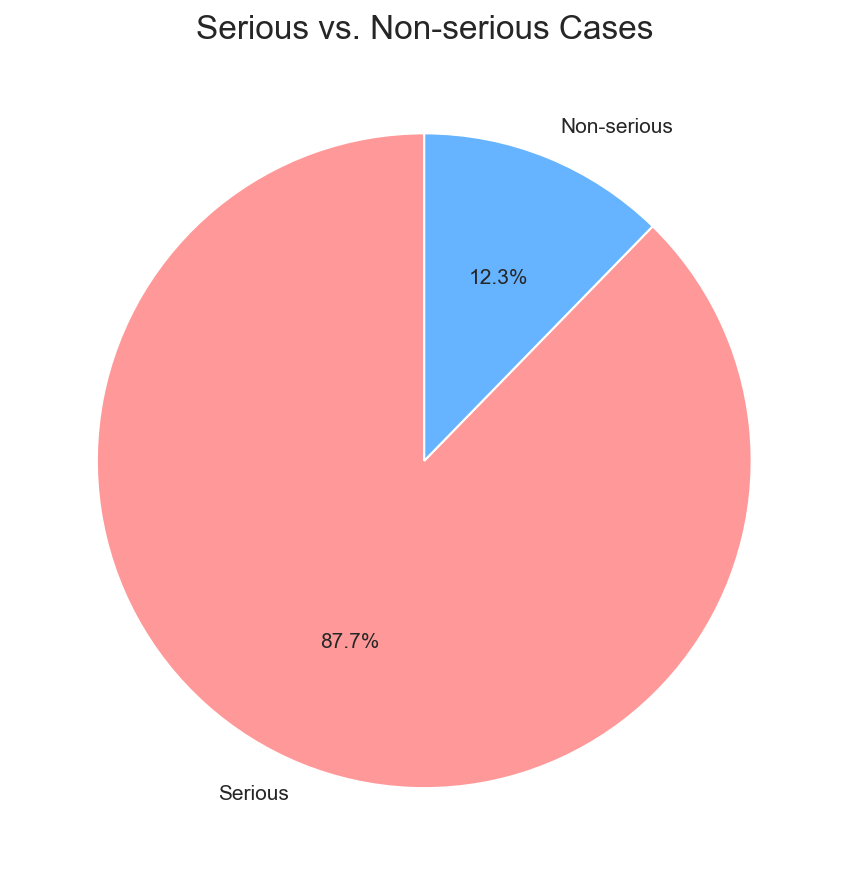

In [41]:
# 4.2 การวิเคราะห์ความรุนแรงของเคส (Serious vs. Non-serious)
label_map = {
    'The adverse event resulted in death, a life threatening condition, hospitalization, disability, congenital anomaly, or other serious condition': 'Serious',
    'The adverse event did not result in any of the above': 'Non-serious'
}

adult_data['serious_short'] = adult_data['serious'].map(label_map)


plt.figure(figsize=(8, 6))
serious_counts = adult_data['serious_short'].value_counts()
plt.pie(serious_counts, labels=serious_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['#ff9999','#66b3ff'])
plt.title('Serious vs. Non-serious Cases', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.savefig(output_file + '4_2_serious_vs_nonserious_short.png')
plt.show()


/tmp/ipykernel_28770/3585429772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='reaction_outcome',


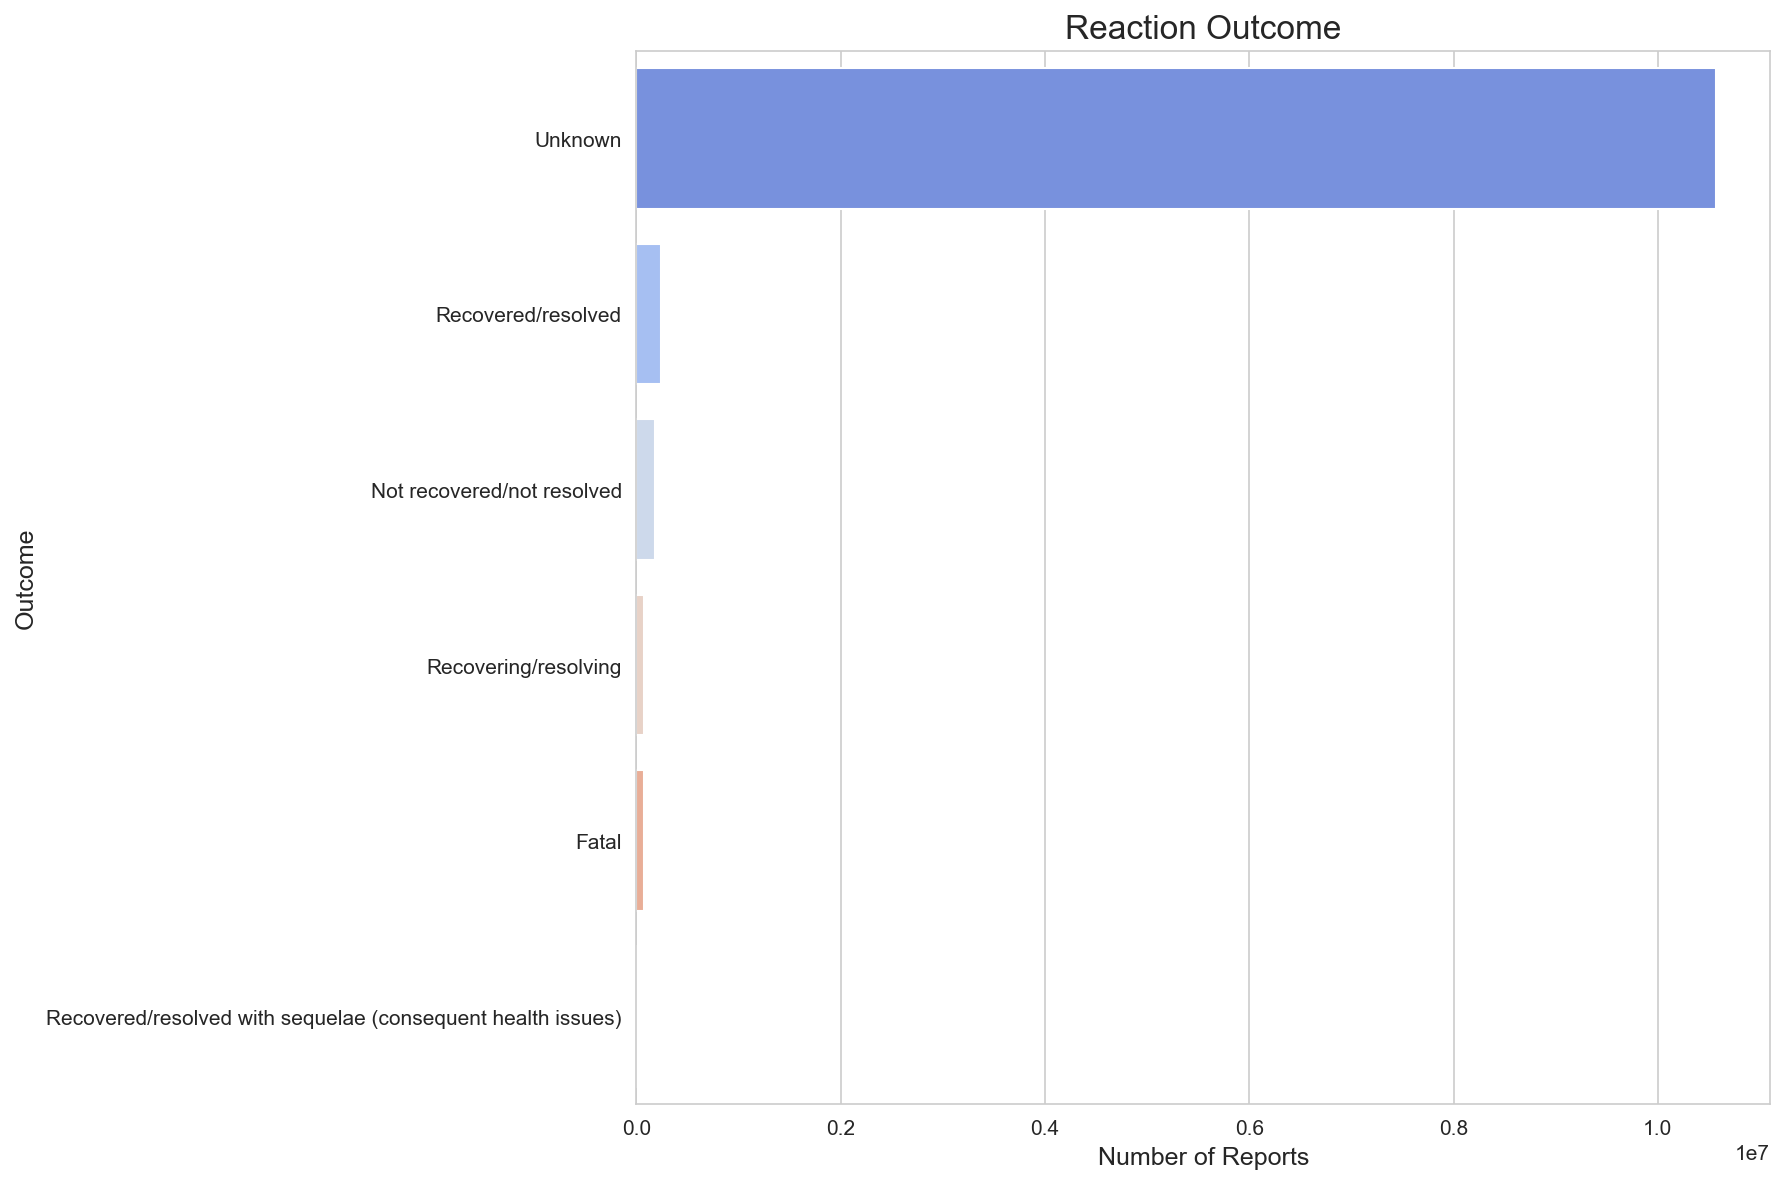

In [42]:
plt.figure(figsize=(12, 8))
sns.countplot(y='reaction_outcome',
              data=adult_data,
              order=adult_data['reaction_outcome'].value_counts().index,
              palette='coolwarm')
plt.title('Reaction Outcome', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Outcome', fontsize=12)
plt.tight_layout()
plt.savefig(output_file+'4_3_reaction_outcome.png')
plt.show()

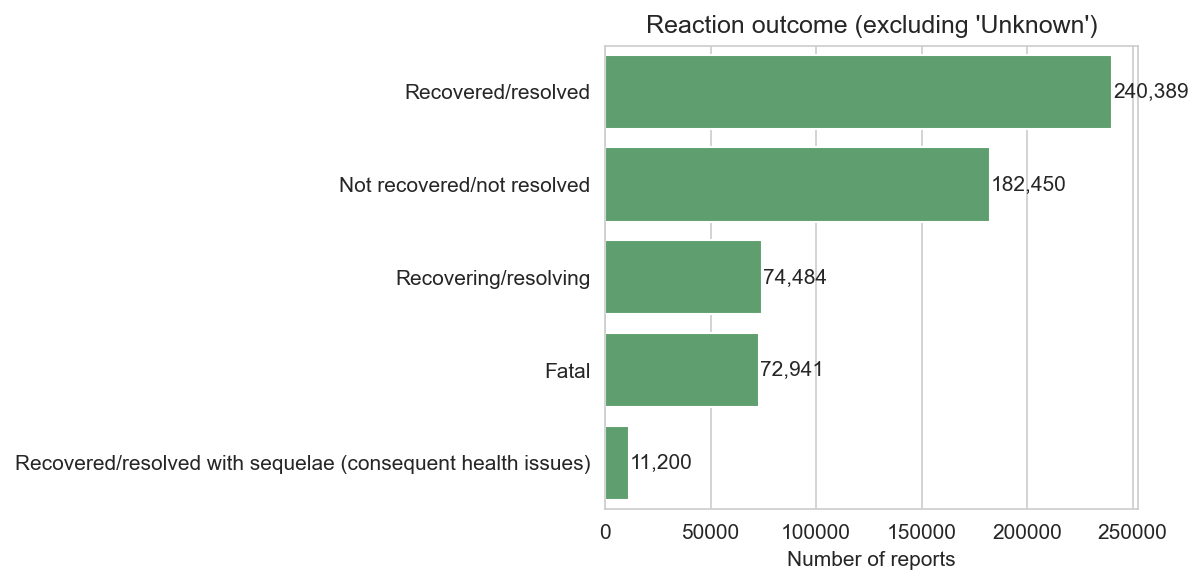

In [43]:
known = adult_data.loc[adult_data['reaction_outcome'] != 'Unknown']
order = known['reaction_outcome'].value_counts().index
plt.figure(figsize=(8,4))
ax = sns.countplot(y='reaction_outcome',
                   data=known,
                   order=order,
                   color="#55A868")

plt.title("Reaction outcome (excluding 'Unknown')")
plt.xlabel("Number of reports"); plt.ylabel("")

for p in ax.patches:
    width  = p.get_width()
    y_pos  = p.get_y() + p.get_height()/2
    ax.text(width + 300,
            y_pos,
            f"{width:,.0f}",
            va='center')

plt.tight_layout()
plt.show()

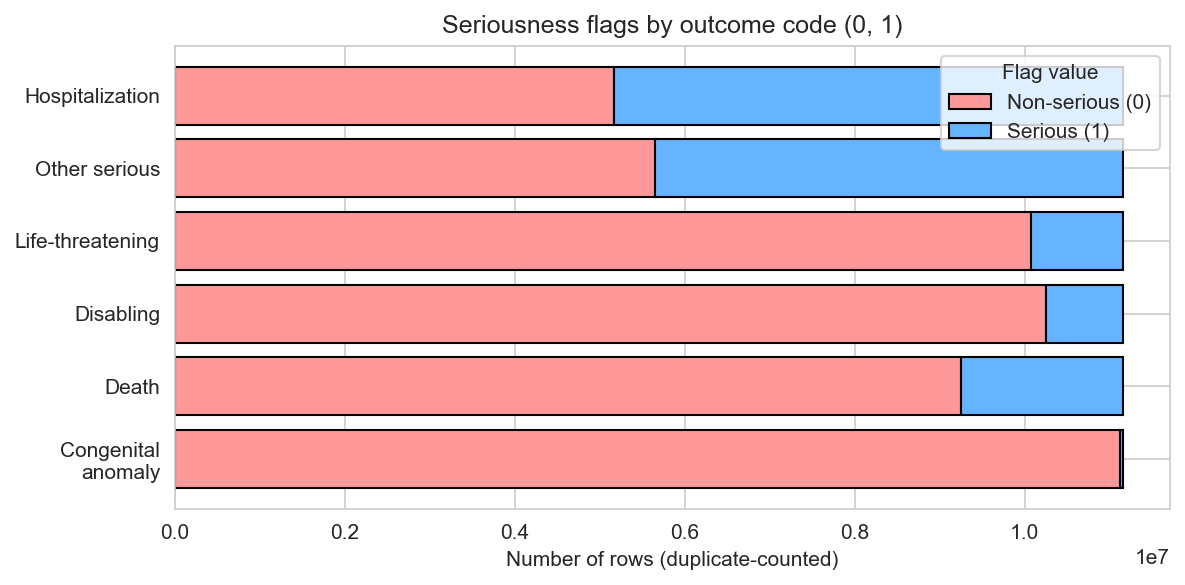

In [44]:
df = adult_data.copy()     

flags = [
    "congenital_anomali",
    "death",
    "disabling",
    "life_threatening",
    "other",
    "hospitalization"
]

disp_names = [             
    "Congenital\nanomaly",
    "Death",
    "Disabling",
    "Life-threatening",
    "Other serious",
    "Hospitalization"
]

# --------------- 2) นับจำนวน 0-1-2 --------------------

count_matrix = (
    df[flags]
    .apply(lambda s: s.value_counts(dropna=False).reindex([0, 1], fill_value=0))
    .T
)
count_matrix.columns = ["Non-serious (0)", "Serious (1)"]
count_matrix.index = disp_names

# --------------- 3) พล็อตแท่งซ้อน --------------------
colors = [ "#ff9999", "#66b3ff"]  

fig, ax = plt.subplots(figsize=(8,4))

bottom = pd.Series([0]*len(count_matrix), index=count_matrix.index)
for col, color in zip(count_matrix.columns, colors):
    ax.barh(
        count_matrix.index,
        count_matrix[col],
        left=bottom,
        color=color,
        edgecolor="k",
        label=col
    )
    bottom += count_matrix[col]

ax.set_xlabel("Number of rows (duplicate-counted)")
ax.set_title("Seriousness flags by outcome code (0, 1)")
ax.legend(title="Flag value")
plt.tight_layout()
plt.show()


In [45]:
print("\nสรุปข้อมูลเบื้องต้นของอาการไม่พึงประสงค์:")
print("5 อาการที่พบบ่อยที่สุด:")
print(adult_data['reaction_meddrapt'].value_counts().head())
print("\nสัดส่วนความรุนแรง:")
print(adult_data['serious'].value_counts())
print("\nผลลัพธ์ของอาการ:")
print(adult_data['reaction_outcome'].value_counts())


สรุปข้อมูลเบื้องต้นของอาการไม่พึงประสงค์:
5 อาการที่พบบ่อยที่สุด:
reaction_meddrapt
NAUSEA              125937
DYSPNOEA             99979
VOMITING             88281
DIARRHOEA            83988
DRUG INEFFECTIVE     82916
Name: count, dtype: int64

สัดส่วนความรุนแรง:
serious
The adverse event resulted in death, a life threatening condition, hospitalization, disability, congenital anomaly, or other serious condition    9780884
The adverse event did not result in any of the above                                                                                              1370780
Name: count, dtype: int64

ผลลัพธ์ของอาการ:
reaction_outcome
Unknown                                                        10570200
Recovered/resolved                                               240389
Not recovered/not resolved                                       182450
Recovering/resolving                                              74484
Fatal                                                             729

Top 10 Medicinal Product: VIOXX


/tmp/ipykernel_28770/1328074882.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reactions_for_top_drugs.values, y=top_reactions_for_top_drugs.index, palette='viridis')


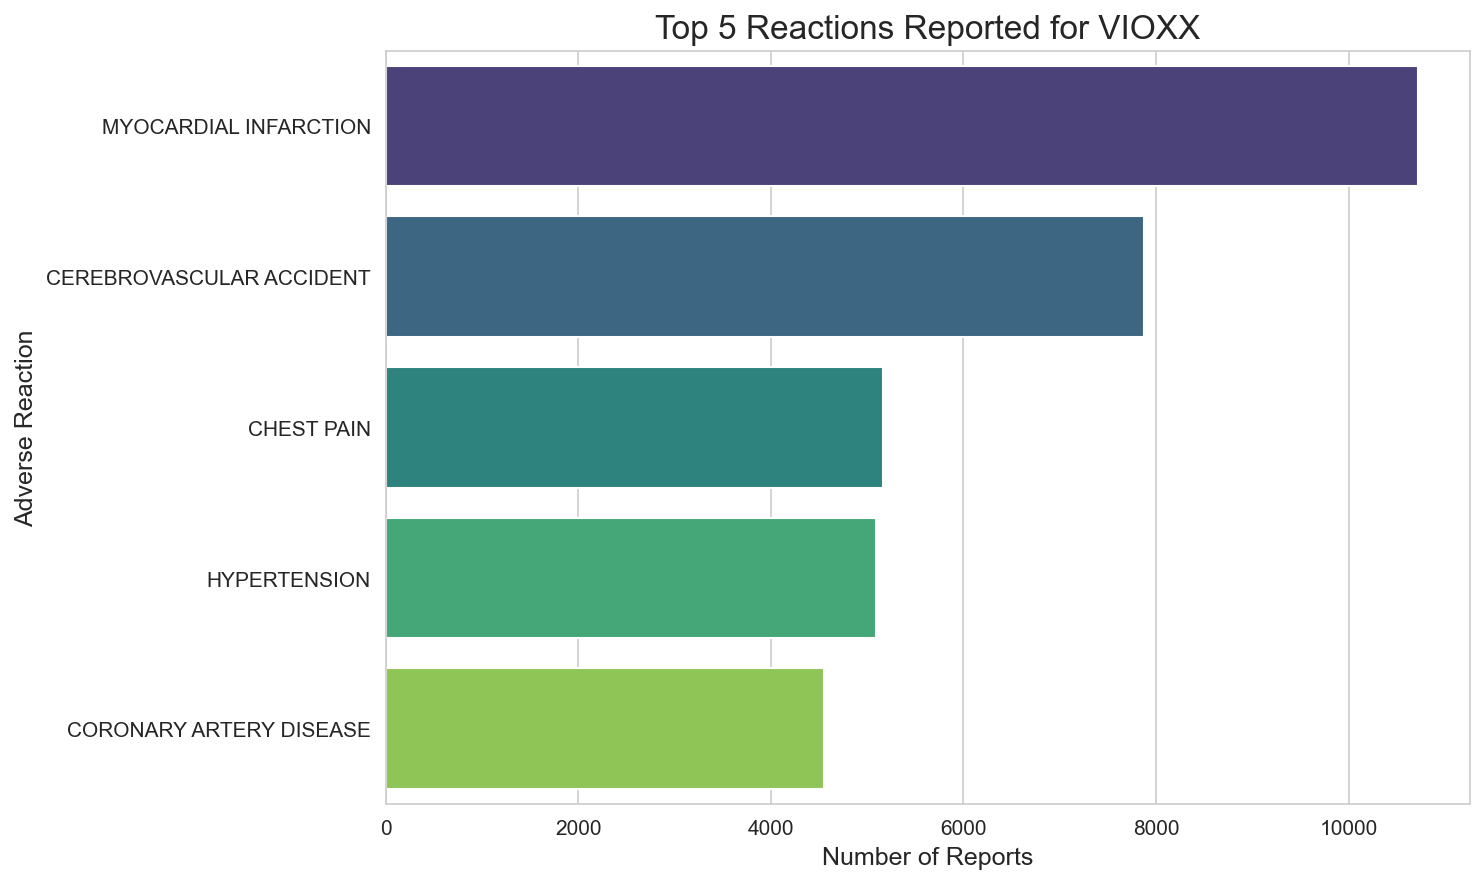

In [46]:
# 5.1 ความสัมพันธ์ระหว่างยาและอาการ (Drug vs. Reaction)
# ค้นหายาที่ถูกรายงานบ่อยที่สุด
top_drug = adult_data['medicinal_product'].mode()[0]
print(f'Top 10 Medicinal Product: {top_drug}')


top_reactions_for_top_drugs = adult_data[adult_data['medicinal_product'] == top_drug]['reaction_meddrapt'].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_reactions_for_top_drugs.values, y=top_reactions_for_top_drugs.index, palette='viridis')
plt.title(f'Top 5 Reactions Reported for {top_drug}', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Adverse Reaction', fontsize=12)
plt.tight_layout()
plt.savefig(output_file+'5_1_top_reactions_for_top_drug.png')
plt.show()



ข้อมูลที่เตรียมสำหรับ plot (จำนวนของ 0, 1 ในแต่ละคอลัมน์):
                    Count of 0  Count of 1
congenital_anomali    11126486       25178
disabling             10256003      895661
life_threatening      10072180     1079484
death                  9251379     1900285
other                  5647293     5504371
hospitalization        5165714     5985950


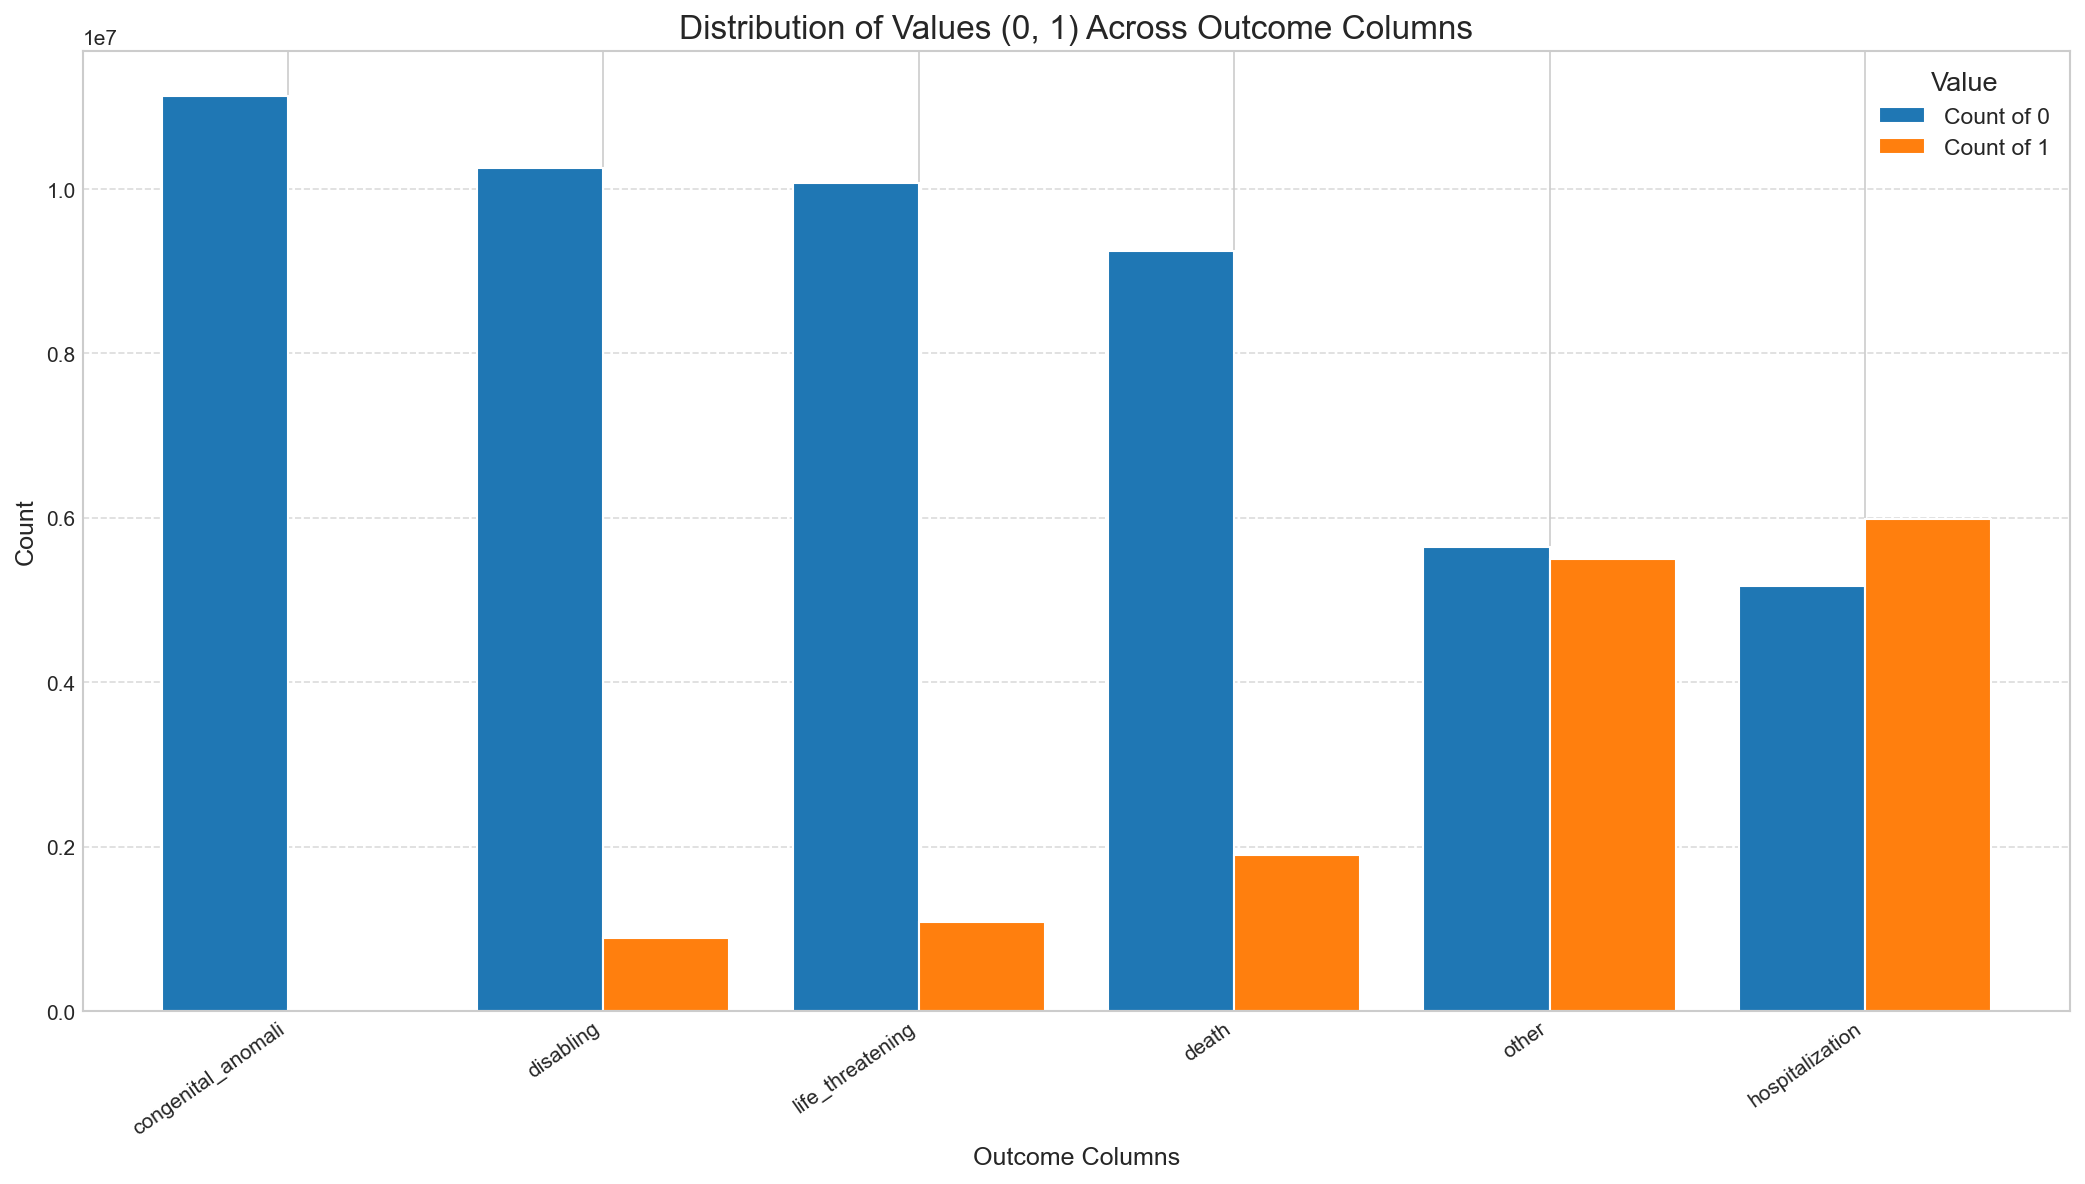

In [48]:
outcome_cols = ['congenital_anomali', 'disabling', 'life_threatening', 'death', 'other', 'hospitalization']
counts_data = {}

for i in outcome_cols:
    counts = adult_data[i].value_counts().reindex([0, 1], fill_value=0).sort_index()
    counts_data[i] = counts

plot_df = pd.DataFrame(counts_data)
plot_df_transposed = plot_df.transpose()
plot_df_transposed.columns = ['Count of 0', 'Count of 1']

print("\nข้อมูลที่เตรียมสำหรับ plot (จำนวนของ 0, 1 ในแต่ละคอลัมน์):")
print(plot_df_transposed)

plt.style.use('seaborn-v0_8-whitegrid')
ax = plot_df_transposed.plot(kind='bar', figsize=(14, 8), width=0.8)

plt.title('Distribution of Values (0, 1) Across Outcome Columns', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Outcome Columns', fontsize=12)
plt.xticks(rotation=35, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Value', title_fontsize='13', fontsize='11', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(output_file+'6_1_outcome_distribution.png')
plt.show()